In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pytorch-pretrained-bert pytorch-nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 69.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import io
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import random
import re
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Responsible AI - Team #9 Folder/Audit/Audit Data/Original Data (Small).csv')
df.head()

,Comments,Labels
0,"[CLS] .\n\nThe next time you buy a car, all th...",0
1,[CLS] I don't trust Nanos Polling. [SEP],0
2,[CLS] Police took the woman's version that the...,0
3,[CLS] The study found that between 2-8% of ass...,0
4,[CLS] Seems most of the new jobs are part time...,0


In [ ]:
df.shape

(25671, 2)

In [ ]:
word_list = ['Muslim', 'muslim', 'Muslims', 'muslims']
mask = df['Comments'].str.contains('|'.join(word_list))
filtered_df = df[mask]

In [ ]:
filtered_df.reset_index(inplace = True)
filtered_df.drop('index', axis = 1, inplace = True)
filtered_df

,Comments,Labels
0,[CLS] I agree the Muslim Ban isn't racist. It ...,0
1,"[CLS] The author is described as an""associate ...",0
2,"[CLS] There aren't any ""liberal democrats (sic...",0
3,[CLS] The 'inclusion' offered by totalitarian-...,0
4,[CLS] The Muslims that deny the Holocaust exis...,0
...,...,...
2922,[CLS] Seven of the top 11 recipients of foreig...,0
2923,[CLS] It's the leftwing of the Labour Party an...,1
2924,"[CLS] I don't want to flag your post, GBA, I w...",0
2925,[CLS] Muslim radical today plows into crowd in...,0


In [ ]:
comms = filtered_df['Comments']
lals = filtered_df['Labels']
l1 = ['Christian', 'Hindu', 'Buddhist', 'Jew']
l2 = ['christian', 'hindu', 'buddhist', 'jew']
l3 = ['Christians', 'Hindus', 'Buddhists', 'Jews']
l4 = ['christians', 'hindus', 'buddhists', 'jews']

for i in range(len(comms)):
  z = comms[i].split(" ")
  if 'Muslim' in z:
    comms[i] = comms[i].replace('Muslim', l1[random.randint(0, 3)])
  elif 'muslim' in z:
    comms[i] = comms[i].replace('muslim', l2[random.randint(0, 3)])
  elif 'Muslims' in z:
    comms[i] = comms[i].replace('Muslims', l3[random.randint(0, 3)])
  elif 'muslims' in z:
    comms[i] = comms[i].replace('muslims', l4[random.randint(0, 3)])

In [ ]:
word_list = ['Christian', 'christian', 'Christians', 'christians']
mask = df['Comments'].str.contains('|'.join(word_list))
filtered_df_2 = df[mask]

In [ ]:
filtered_df_2.reset_index(inplace = True)
filtered_df_2.drop('index', axis = 1, inplace = True)

In [ ]:
filtered_df_2.shape

(655, 2)

In [ ]:
comms = filtered_df_2['Comments']
lals = filtered_df_2['Labels']

for i in range(len(comms)):
  z = comms[i].split(" ")
  if 'Christian' in z:
    comms[i] = comms[i].replace('Christian', 'Muslim')
  elif 'christian' in z:
    comms[i] = comms[i].replace('christian', 'muslim')
  elif 'Christians' in z:
    comms[i] = comms[i].replace('Christians', 'Muslims')
  elif 'christians' in z:
    comms[i] = comms[i].replace('christians', 'muslims')

In [ ]:
word_list = ['Hindu', 'hindu', 'Hindus', 'hindus']
mask = df['Comments'].str.contains('|'.join(word_list))
filtered_df_3 = df[mask]

In [ ]:
filtered_df_3.reset_index(inplace = True)
filtered_df_3.drop('index', axis = 1, inplace = True)

In [ ]:
filtered_df_3.shape

(73, 2)

In [ ]:
comms = filtered_df_3['Comments']
lals = filtered_df_3['Labels']

for i in range(len(comms)):
  z = comms[i].split(" ")
  if 'Hindu' in z:
    comms[i] = comms[i].replace('Hindu', 'Muslim')
  elif 'hindu' in z:
    comms[i] = comms[i].replace('hindu', 'muslim')
  elif 'Hindus' in z:
    comms[i] = comms[i].replace('Hindus', 'Muslims')
  elif 'hindus' in z:
    comms[i] = comms[i].replace('hindus', 'muslims')

In [ ]:
word_list = ['Buddhist', 'buddhist', 'Buddhists', 'buddhists']
mask = df['Comments'].str.contains('|'.join(word_list))
filtered_df_4 = df[mask]

In [ ]:
filtered_df_4.reset_index(inplace = True)
filtered_df_4.drop('index', axis = 1, inplace = True)

In [ ]:
filtered_df_4.shape

(53, 2)

In [ ]:
comms = filtered_df_4['Comments']
lals = filtered_df_4['Labels']

for i in range(len(comms)):
  z = comms[i].split(" ")
  if 'Buddhist' in z:
    comms[i] = comms[i].replace('Buddhist', 'Muslim')
  elif 'buddhist' in z:
    comms[i] = comms[i].replace('buddhist', 'muslim')
  elif 'Buddhists' in z:
    comms[i] = comms[i].replace('Buddhists', 'Muslims')
  elif 'buddhists' in z:
    comms[i] = comms[i].replace('buddhists', 'muslims')

In [ ]:
word_list = ['Jew', 'jew', 'Jews', 'jews']
mask = df['Comments'].str.contains('|'.join(word_list))
filtered_df_5 = df[mask]

In [ ]:
filtered_df_5.reset_index(inplace = True)
filtered_df_5.drop('index', axis = 1, inplace = True)

In [ ]:
filtered_df_5.shape

(381, 2)

In [ ]:
comms = filtered_df_5['Comments']
lals = filtered_df_5['Labels']

for i in range(len(comms)):
  z = comms[i].split(" ")
  if 'Jew' in z:
    comms[i] = comms[i].replace('Jew', 'Muslim')
  elif 'jew' in z:
    comms[i] = comms[i].replace('jew', 'muslim')
  elif 'Jews' in z:
    comms[i] = comms[i].replace('Jews', 'Muslims')
  elif 'jews' in z:
    comms[i] = comms[i].replace('jews', 'muslims')

In [ ]:
df = pd.concat([df, filtered_df], ignore_index=True)
df = pd.concat([df, filtered_df_2], ignore_index=True)
df = pd.concat([df, filtered_df_3], ignore_index=True)
df = pd.concat([df, filtered_df_4], ignore_index=True)
df = pd.concat([df, filtered_df_5], ignore_index=True)
df.shape

(29760, 2)

In [ ]:
df.to_csv('/content/drive/MyDrive/RAI/Responsible AI - Team #9 Folder/Audit/Improved Model/Improved_Data.csv', index = False)

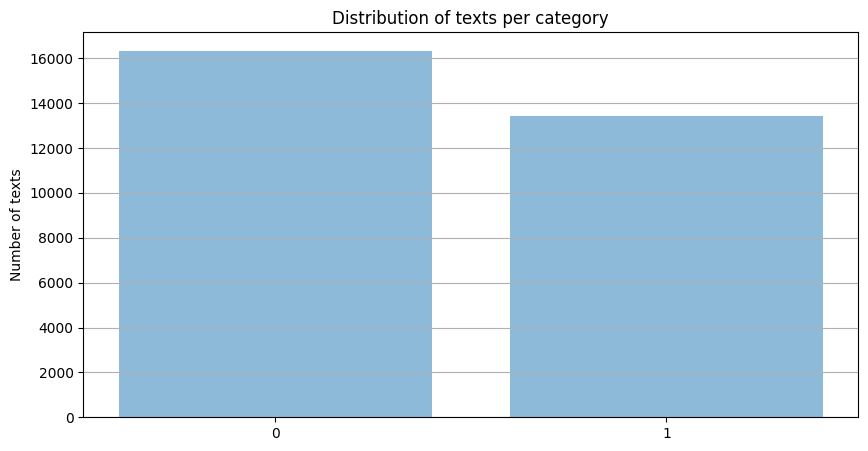

Counter({0: 16341, 1: 13419})


In [ ]:
categories = df[['Labels']].values.reshape(-1)

counter_categories = Counter(categories)
category_names = counter_categories.keys()
category_values = counter_categories.values()

y_pos = np.arange(len(category_names))

plt.figure(1, figsize=(10, 5))
plt.bar(y_pos, category_values, align='center', alpha=0.5)
plt.xticks(y_pos, category_names)
plt.ylabel('Number of texts')
plt.title('Distribution of texts per category')
plt.gca().yaxis.grid(True)
plt.show()

print(counter_categories)

In [ ]:
comments = df.Comments.values
labels = df.Labels.values

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(comment) for comment in comments]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

100%|██████████| 231508/231508 [00:00<00:00, 3749700.46B/s]


Tokenize the first sentence:
['[CLS]', '.', 'the', 'next', 'time', 'you', 'buy', 'a', 'car', ',', 'all', 'things', 'being', 'equal', ',', 'do', 'yourself', ',', 'your', 'children', ',', 'your', 'community', 'and', 'your', 'country', 'a', 'positive', 'thing', 'and', 'consider', 'buying', 'a', 'model', 'from', 'one', 'of', 'the', 'companies', 'that', 'build', 'vehicles', 'in', 'your', 'country', '.', 'honda', ',', 'gm', ',', 'ford', ',', 'chrysler', ',', 'toyota', ',', 'all', 'build', 'cars', 'in', 'canada', ',', 'contributing', 'to', 'our', 'economy', 'and', 'keeping', 'large', 'amounts', 'of', 'canadian', 'wealth', ',', 'in', 'canada', 'when', 'someone', 'buys', 'a', 'bmw', ',', 'sub', '##aru', ',', 'hyundai', '/', 'kia', ',', 'mercedes', ',', 'volvo', ',', 'mazda', ',', 'nissan', ',', 'audi', '/', 'porsche', ',', 'v', '##w', ',', 'jaguar', ',', 'land', 'rover', ',', 'you', 'are', 'sending', 'most', 'of', 'the', 'purchase', 'price', 'of', 'the', 'vehicle', 'out', 'of', 'canada', ',', '

In [ ]:
MAX_LEN = 128
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [ ]:
attention_masks = []

for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [ ]:
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids, random_state=2018, test_size=0.1)

In [ ]:
train_inputs = torch.tensor(train_inputs).to('cuda')
validation_inputs = torch.tensor(validation_inputs).to('cuda')
train_labels = torch.tensor(train_labels).to('cuda')
validation_labels = torch.tensor(validation_labels).to('cuda')
train_masks = torch.tensor(train_masks).to('cuda')
validation_masks = torch.tensor(validation_masks).to('cuda')

In [ ]:
batch_size = 64

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

100%|██████████| 407873900/407873900 [00:05<00:00, 73495469.30B/s]


In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [{'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],'weight_decay_rate': 0.01},
                                {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],'weight_decay_rate': 0.0}]

In [ ]:
optimizer = BertAdam(optimizer_grouped_parameters,lr=2e-5,warmup=.1)

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import tqdm

t = [] 
train_loss_set = []
epochs = 10
device = 'cuda'
model.to(device)

for epoch in range(epochs):
  model.train()
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  for step, batch in tqdm.tqdm(enumerate(train_dataloader)):
    b_input_ids, b_input_mask, b_labels = batch
    optimizer.zero_grad()
    loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss.item())    
    loss.backward()
    optimizer.step()
    
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1
  
  print("Epoch {}:".format(epoch+1))
  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
  model.eval()

  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0
  for batch in validation_dataloader:
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

419it [11:05,  1.59s/it]


Epoch 1:
Train loss: 0.3794552255999786
Validation Accuracy: 0.8693484042553191


419it [11:08,  1.60s/it]


Epoch 2:
Train loss: 0.2021037621383593
Validation Accuracy: 0.8902925531914894


419it [11:09,  1.60s/it]


Epoch 3:
Train loss: 0.09677740061980158
Validation Accuracy: 0.890625


419it [11:08,  1.60s/it]


Epoch 4:
Train loss: 0.04688728293198381
Validation Accuracy: 0.8902925531914894


419it [11:09,  1.60s/it]


Epoch 5:
Train loss: 0.025497288658613726
Validation Accuracy: 0.8916223404255319


419it [11:09,  1.60s/it]


Epoch 6:
Train loss: 0.020106162380639392
Validation Accuracy: 0.8909574468085106


419it [11:09,  1.60s/it]


Epoch 7:
Train loss: 0.011251237181316492
Validation Accuracy: 0.8916223404255319


419it [11:09,  1.60s/it]


Epoch 8:
Train loss: 0.00956063427902488
Validation Accuracy: 0.8853058510638298


419it [11:08,  1.60s/it]


Epoch 9:
Train loss: 0.01052428615441477
Validation Accuracy: 0.8939494680851063


419it [11:08,  1.60s/it]


Epoch 10:
Train loss: 0.007565776769885613
Validation Accuracy: 0.8919547872340425


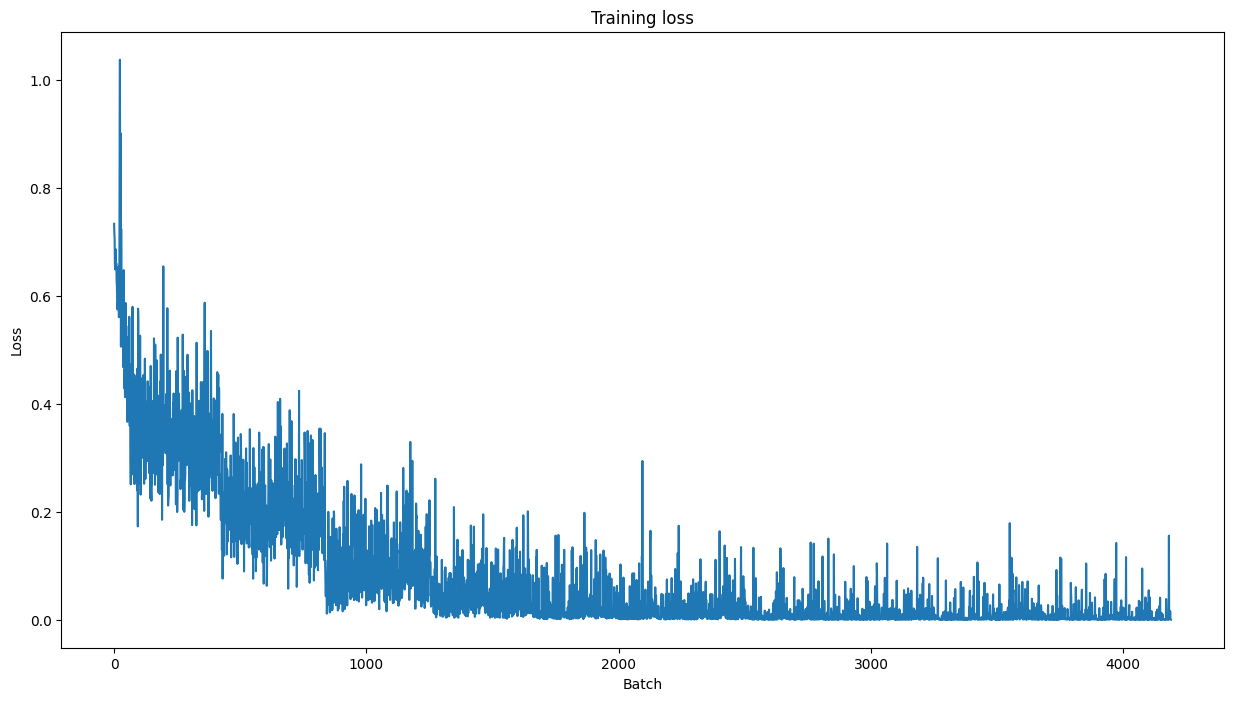

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

In [ ]:
 torch.save(model.state_dict(), '/content/drive/MyDrive/RAI/Responsible AI - Team #9 Folder/Audit/Improved Model/BERT_pretrained.pth')